In [2]:
import json
import matplotlib.pyplot as plt
%matplotlib inline
from typing import Optional
import numpy as np
import os
from strawberryfields.backends.tfbackend.states import FockStateTF
from math import exp
from src.utils import von_neumann_entropy, renyi_entropy

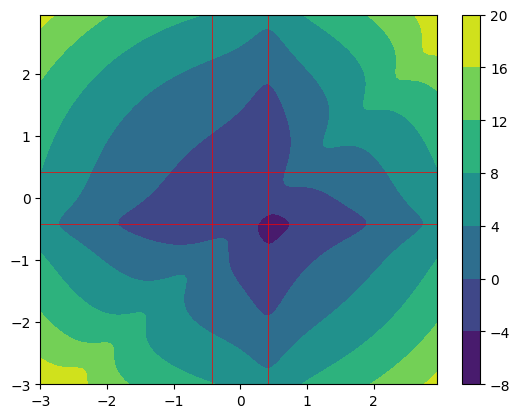

In [3]:
def potential(x, y, d, theta):
    
    ee_int = ((x-y)**2 + d**2 - 2*(y-x)*d*np.cos(theta))**(-0.5)
        
    return x**2 + y**2 - (x**2 + d**2 - 2*x*d*np.cos(np.pi - theta))**(-0.5) + ee_int - (y**2 + d**2 - 2*y*d*np.cos(theta))**(-0.5) 

potentiald = []
d = .5
theta = .58
step = 0.05
for x in np.arange(-3,3,step):
    pot = []
    for y in np.arange(-3,3,step):
        pot.append(potential(x,y,d,theta))
    potentiald.append(pot)
plt.axhline(d*np.cos(theta), c = 'r', linewidth=.5)
plt.axvline(d*np.cos(theta), c = 'r', linewidth=.5)
plt.axhline(-d*np.cos(theta), c = 'r', linewidth=.5)
plt.axvline(-d*np.cos(theta), c = 'r', linewidth=.5)
plt.contourf(np.arange(-3,3,step), np.arange(-3,3,step), potentiald)
plt.colorbar()

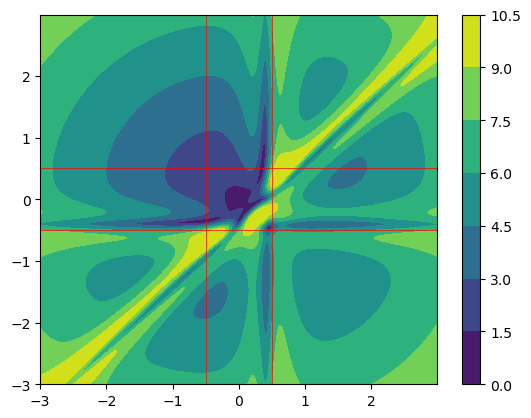

In [14]:
def potential(x, y, d, theta):
    
    ee_int = ((x-y)**2 + d**2 - 2*(y-x)*d*np.cos(theta))**(-0.5)
        
    return x**2 + y**2 - (x**2 + d**2 - 2*x*d*np.cos(np.pi - theta))**(-0.5) + ee_int - (y**2 + d**2 - 2*y*d*np.cos(theta))**(-0.5) 

potentiald = []
derivative_x = []
d = .5
eps = 1e-5
theta = .58
step = 0.005
for x in np.arange(-3,3,step):
    pot = []
    dx = []
    for y in np.arange(-3,3,step):
        pot.append(potential(x,y,d,theta))
        vec = np.array([(potential(x+eps,y,d,theta) - potential(x,y,d,theta))/eps, (potential(x,y+eps,d,theta) - potential(x,y,d,theta))/eps])
        dx.append(np.linalg.norm(vec))
    potentiald.append(pot)
    derivative_x.append(dx)
plt.axhline(d, c = 'r', linewidth=.5)
plt.axvline(d, c = 'r', linewidth=.5)
plt.axhline(-d, c = 'r', linewidth=.5)
plt.axvline(-d, c = 'r', linewidth=.5)
plt.contourf(np.arange(-3,3,step), np.arange(-3,3,step), np.clip(abs(np.array(derivative_x)),-1, 10))
plt.colorbar()

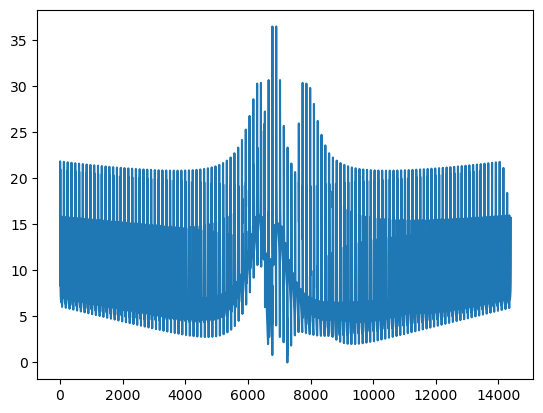

In [161]:
plt.plot(np.array(derivative_x))

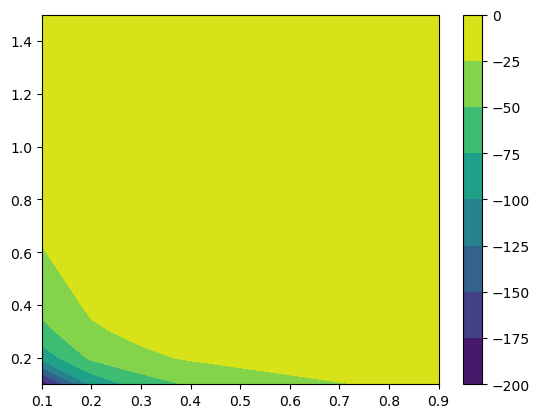

In [20]:
def sorted_potential(d, theta):
    potentiald = []
    for x in np.arange(-3,3,0.1):
        pot = []
        for y in np.arange(-3,3,0.1):
            pot.append(potential(x,y,d,theta))
        potentiald.append(pot)
    return np.sort(np.array(potentiald).reshape(-1))

min_pot = []
for d in np.arange(0.1,1,0.1):
    pot = []
    for theta in np.arange(0.1,0.5*np.pi,0.1):
        pot.append(sorted_potential(d, theta)[0])
    min_pot.append(pot)
    
plt.contourf(np.arange(0.1,1,0.1), np.arange(0.1,0.5*np.pi,0.1), np.array(min_pot).T)
plt.colorbar()
        

In [ ]:
def potential(x, y, d, theta):
    
    ee_int = ((x-y)**2 + d**2 - 2*(x-y)*d*np.cos(theta))**(-0.5)
        
    return x**2 + y**2 - (x**2 + d**2 - 2*(x)*d*np.cos(theta))**(-0.5) + ee_int - (y**2 + d**2 + 2*y*d*np.cos(theta))**(-0.5) 

potentiald = []
d = 1.1
theta = .58
step = 0.01
diagonal = []
for x in np.arange(-3,3,step):
    pot = []
    for y in np.arange(-3,3,step):
        if abs(y+x)<1e-3:
            diagonal.append(potential(x,y,d,theta))
        pot.append(potential(x,y,d,theta))
    potentiald.append(pot)
plt.axhline(d*np.cos(theta), c = 'r', linewidth=.5)
plt.axvline(d*np.cos(theta), c = 'r', linewidth=.5)
plt.axhline(-d*np.cos(theta), c = 'r', linewidth=.5)
plt.axvline(-d*np.cos(theta), c = 'r', linewidth=.5)
plt.contourf(np.arange(-3,3,step), np.arange(-3,3,step), np.array(potentiald).T)
plt.colorbar()
min = np.min(np.array(potentiald).T)
idx = np.where(np.array(potentiald) == min)
print(idx)
plt.scatter(np.arange(-3,3,step)[idx[0]], np.arange(-3,3,step)[idx[1]])

In [ ]:
def potential(x, y, d, theta):
    
    ee_int = ((x-y)**2 + d**2 - 2*(x-y)*d*np.cos(theta))**(-0.5)
        
    return x**2 + y**2 - (x**2 + d**2 - 2*(x)*d*np.cos(theta))**(-0.5) + ee_int - (y**2 + d**2 + 2*y*d*np.cos(theta))**(-0.5) 

potentiald = []
n = 10
d = distances[n]
theta = .58
step = 0.012
diagonal = []
for x in np.arange(-3,3,step):
    pot = []
    for y in np.arange(-3,3,step):
        if np.round(abs(x+y),4)==0:
            diagonal.append(potential(x,y,d,theta))
        pot.append(potential(x,y,d,theta))
    potentiald.append(pot)
plt.axhline(d*np.cos(theta), c = 'r', linewidth=.5)
plt.axvline(d*np.cos(theta), c = 'r', linewidth=.5)
plt.axhline(-d*np.cos(theta), c = 'r', linewidth=.5)
plt.axvline(-d*np.cos(theta), c = 'r', linewidth=.5)
plt.contourf(np.arange(-3,3,step), np.arange(-3,3,step), np.array(potentiald).T)
plt.colorbar()
min = np.min(np.array(potentiald))
idx = np.where(np.array(potentiald) == min)
print(idx)
plt.scatter(np.arange(-3,3,step)[idx[0]], np.arange(-3,3,step)[idx[1]])

In [ ]:
from src.utils import quadratures_density
def potential(x, y, d, theta):
    
    ee_int = ((x-y)**2 + d**2 - 2*(x-y)*d*np.cos(theta))**(-0.5)
        
    return x**2 + y**2 - (x**2 + d**2 - 2*(x)*d*np.cos(theta))**(-0.5) + ee_int - (y**2 + d**2 + 2*y*d*np.cos(theta))**(-0.5) 

frame = 0
m = 2
for n in np.flip(np.arange(20,150, 5)):
    print(n)
    potentiald = []

    d = distances[n]
    theta = thetas[m]
    step = 0.012
    diagonal = []
    for x in np.arange(-3,3,step):
        diagonal.append(potential(x,-x,d,theta))
    quadrature_grid = np.arange(-3,3,.012)
    joint_density1 = quadratures_density(
            x=quadrature_grid,
            alpha=states[m, n],
            num_modes=2,
            cutoff=5
        )
    diagw = []
    for i in range(0,len(quadrature_grid)):
        diagw.append(joint_density1[i,len(quadrature_grid)-i-1])
    plt.clf()
    plt.plot(quadrature_grid, np.array(diagonal))
    plt.plot(quadrature_grid, 10*np.flip(diagw))
    #plt.ylim(-.2, .5)
    plt.savefig('./plottini_gif/{}.png'.format(frame))
    frame+=1

In [ ]:
plt.plot(quadrature_grid[0:-2],.1*np.array(diagonal)[0:-2])
plt.plot(quadrature_grid[0:-2], np.flip(diagw))
plt.ylim(-.2, .5)

In [ ]:
def potential(x, y, d, theta):
    
    ee_int = ((x-y)**2 + d**2 - 2*(y-x)*d*np.cos(theta))**(-0.5)
        
    return x**2 + y**2 - (x**2 + d**2 - 2*x*d*np.cos(np.pi - theta))**(-0.5) + ee_int - (y**2 + d**2 - 2*y*d*np.cos(theta))**(-0.5) 

potentiald = []
derivative_x = []
d = .5
eps = 1e-5
theta = .58
step = 0.005
for x in np.arange(-3,3,step):
    pot = []
    dx = []
    for y in np.arange(-3,3,step):
        pot.append(potential(x,y,d,theta))
        vec = np.array([(potential(x+eps,y,d,theta) - potential(x,y,d,theta))/eps, (potential(x,y+eps,d,theta) - potential(x,y,d,theta))/eps])
        dx.append(np.linalg.norm(vec))
    potentiald.append(pot)
    derivative_x.append(dx)
plt.axhline(d, c = 'r', linewidth=.5)
plt.axvline(d, c = 'r', linewidth=.5)
plt.axhline(-d, c = 'r', linewidth=.5)
plt.axvline(-d, c = 'r', linewidth=.5)
plt.contourf(np.arange(-3,3,step), np.arange(-3,3,step), np.clip(abs(np.array(derivative_x)),-1, 10))
plt.colorbar()